In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

2025-12-17 10:18:34.901817: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-17 10:18:34.902233: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-17 10:18:34.962947: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-17 10:18:36.431294: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [2]:
train_ds, val_ds = image_dataset_from_directory(
    '../Data/proccessed',
    batch_size=32,
    image_size=(224,224),
    subset='both',
    seed=18,
    validation_split=0.2,
)

Found 2671 files belonging to 4 classes.
Using 2137 files for training.
Using 534 files for validation.


2025-12-17 10:18:37.425863: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_INVALID_DEVICE: invalid device ordinal
2025-12-17 10:18:37.425904: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-12-17 10:18:37.425911: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: tripwireguy-UBUNTU
2025-12-17 10:18:37.425916: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] hostname: tripwireguy-UBUNTU
2025-12-17 10:18:37.426015: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] libcuda reported version is: 580.95.5
2025-12-17 10:18:37.426038: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:194] kernel

In [3]:
base = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base.trainable = False

In [4]:
inputs = Input(shape=(224,224,3))

x = preprocess_input(inputs)

In [5]:
x = base(x)

In [6]:
x = GlobalAveragePooling2D()(x)

In [7]:
x = Dense(128, activation='relu')(x)

In [8]:
# x = Dense(64, activation='sigmoid')(x)

In [9]:
outputs = Dense(4, activation='softmax')(x)

In [10]:
model = Model(inputs=inputs, outputs = outputs)

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3, 
    restore_best_weights=True
)

In [13]:
checkpoint = ModelCheckpoint('model_ckeckpoint.weights.h5',
                             monitor='val_accuracy',
                             save_weights_only=True
)

In [14]:
model.fit(train_ds,
          validation_data=val_ds,
          epochs=10, 
          callbacks=[early_stop,checkpoint]
)

Epoch 1/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 392ms/step - accuracy: 0.7183 - loss: 0.6543 - val_accuracy: 0.7940 - val_loss: 0.4323
Epoch 2/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 378ms/step - accuracy: 0.8671 - loss: 0.3298 - val_accuracy: 0.8221 - val_loss: 0.4031
Epoch 3/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 414ms/step - accuracy: 0.9116 - loss: 0.2402 - val_accuracy: 0.8371 - val_loss: 0.3985
Epoch 4/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 28s 419ms/step - accuracy: 0.9233 - loss: 0.2014 - val_accuracy: 0.8464 - val_loss: 0.3538
Epoch 5/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 26s 386ms/step - accuracy: 0.9593 - loss: 0.1381 - val_accuracy: 0.8539 - val_loss: 0.3645
Epoch 6/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 378ms/step - accuracy: 0.9635 - loss: 0.1218 - val_accuracy: 0.8446 - val_loss: 0.3715
Epoch 7/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 377ms/step - accuracy: 0.9766 - loss: 0.0883 - val_accuracy: 0.8652 - val_loss: 0.3424
Epoch 8/10
67/67 ━━━━━━━━━━━━━━━━━━━━ 25s 374ms/step - accuracy: 0.9841 - loss: 0.0705 - val_accu

In [15]:
y_pred = model.predict(val_ds)

17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 357ms/step


In [16]:
y_pred[0]

array([4.5232017e-07, 1.9711744e-04, 5.1213604e-01, 4.8766637e-01],
      dtype=float32)

In [61]:
i = 1
b = 3

for imgs, labels in val_ds.take(b):
    img = imgs[i]
    label = labels[i]

2025-12-17 10:27:10.592965: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [62]:
img_np = img.numpy().astype(np.uint8)

In [63]:
img_ = Image.fromarray(img_np)

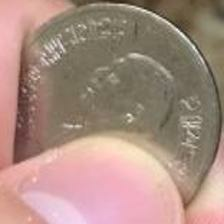

In [64]:
img_

In [65]:
print(label)

tf.Tensor(3, shape=(), dtype=int32)


In [66]:
pred_labels = y_pred[i + (b - 1) *32]

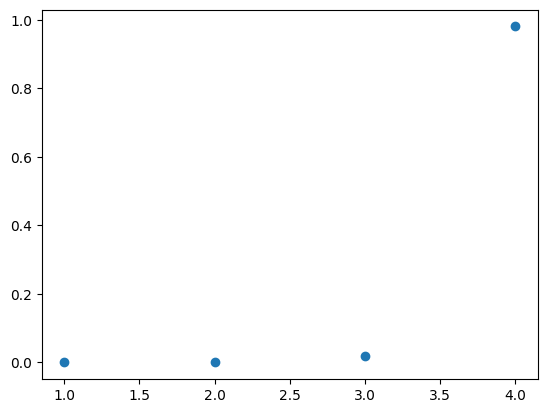

In [67]:
plt.scatter([ j + 1 for j in range(4)], pred_labels)

In [68]:
labels_str = ['0.5 JD', '0.25 JD', '10 Piasters', '5 Piasters']

In [69]:
pred_labels_zip = list(zip(pred_labels,labels_str))

In [70]:
pred_labels_zip.sort(reverse=True)

In [71]:
pred_labels_zip[0][1]

'5 Piasters'

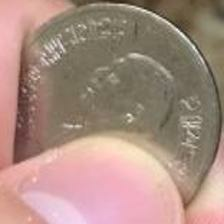

In [72]:
img_

In [73]:
test_img_path = '/home/tripwireguy/PycharmProjects/Coin-Jo/Data/proccessed/1-2-dinar/3img_8a.jpg'

In [74]:
test_img = Image.open(test_img_path)

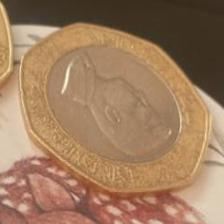

In [75]:
test_img

In [76]:
test_img_np = np.array(test_img)

In [77]:
test_img_np = test_img_np.astype('float32')

In [78]:
test_img_np = preprocess_input(test_img_np)

In [79]:
test_img_np = np.expand_dims(test_img_np, axis=0)

In [36]:
pred = model.predict(test_img_np)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step


In [37]:

pred

array([[4.8867390e-03, 9.8839289e-01, 6.6904854e-03, 2.9957995e-05]],
      dtype=float32)

In [96]:
def predict_image(img_path):
    
    img = Image.open(img_path)
    img = img.resize((224,224))
    
    img_np = np.array(img)
    img_np = img_np.astype('float32')
    
    img_preprocessed = img_np
    img_preprocessed = np.expand_dims(img_preprocessed, axis=0)

    prediction = model.predict(img_preprocessed)[0]

    prediction_labels = list(zip(prediction, labels_str))
    prediction_labels.sort(reverse= True)

    percentage, final_prediction = prediction_labels[0]

    return final_prediction, percentage

In [101]:
x, y = predict_image('/home/tripwireguy/PycharmProjects/Coin-Jo/Data/proccessed/10-Piastres/146img_386a.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [102]:
print(f'predicted that the coin is {x} with {y * 100:.2f}% certainty')

predicted that the coin is 10 Piasters with 88.62% certainty
